# Assignment 2 - Weather
---------
In this program, a CSV file is loaded, and then it plots two variables, which are the dry bulb temperature (Celsius) and reported date time.

This notebook can be tested at the following link:<a target="_blank" href="https://colab.research.google.com/github/FatimaBOliveira/Programming-for-data-analytics/blob/main/Assignments/assignment2-weather.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Load data
The CSV file can be found in the [GitHub of Professor Andrew Beatty](https://github.com/andrewbeattycourseware/PFDA-courseware/blob/main/assignment/weatherreadings1.csv), and I downloaded it into my repository, in the [csv folder](https://github.com/FatimaBOliveira/Programming-for-data-analytics/blob/main/Assignments/csv/weatherreadings1.csv).

Python's library [pandas](https://pandas.pydata.org/docs/getting_started/overview.html) can be used to load the data with [pd.read_csv](https://www.datacamp.com/tutorial/pandas-read-csv), using the name of the file and the path. After that, two variables with the contents of the columns' reported date time and the dry bulb temperature in Celsius are called to simplify the program.

In [1]:
# Import library.
import pandas as pd

In [2]:
# Name of the file.
FILENAME = "weatherreadings1.csv"

# Path to the file.
DATADIR = "./csv/"

# Identify the file.
logFilename = DATADIR + FILENAME

# Load the CSV.
df = pd.read_csv(logFilename)

# Variables to use.
date = df["reportStartDateTime"]
tempc= df["dryBulbTemperature_Celsius"]

## Manipulate the data
Before plotting, the date variable needs to be converted into a datetime argument, with [pd.to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html#pandas.to_datetime), otherwise the x axis won't have a clear output in the graph, because it will show all the dates and times on top of each other.

Then with the package [matplotlib.dates](https://stackoverflow.com/a/45090867), it's possible to select the date format to show in the plot.

The minimum value is located with [np.argmin](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html), and this can be used as an annotation for the plot.

In [3]:
# Convert object to datetime.
date = pd.to_datetime(date) 

# Import libraries.
import numpy as np
import matplotlib.dates as mdates

# Choose the format to show.
myFmt = mdates.DateFormatter("%m-%d %H:%M")

# Check the row with the minimum temperature.
print(np.argmin(tempc))

31


## Plot
To plot, I imported the package [matplotlib.pyplot](https://matplotlib.org/stable/tutorials/pyplot.html#introduction-to-pyplot), and after that I customized it. With the [plt.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html), I identified the variables to use in the x and y axes, then the label to use in the legend.

To apply the date format defined above, I used [plt.gca().xaxis.set_major_formatter(myFmt)](https://stackoverflow.com/a/46467896).

After that, I added a title, axes labels and a legend. The dates can be shown with different [orientations](https://www.geeksforgeeks.org/how-to-rotate-x-axis-tick-label-text-in-matplotlib/), so it will be easier to read. Then a [grid](https://www.w3schools.com/python/matplotlib_grid.asp), with [minor ticks](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.minorticks_on.html) on, is also implemented for better analysis. The [annotation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) is added to show the user the minimum temperature registered. In the last step, I requested Matplotlib to show the results.

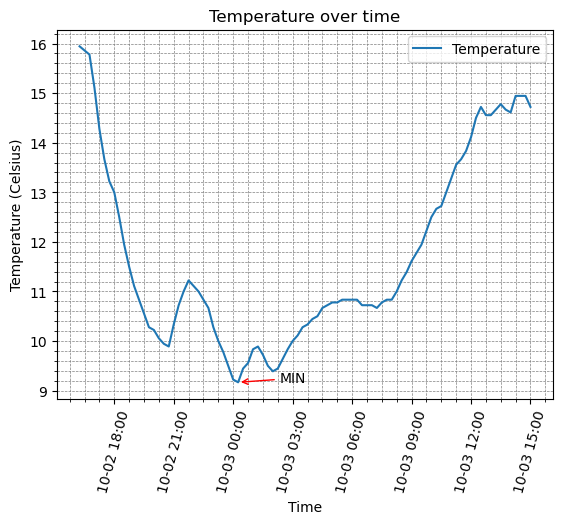

In [4]:
# Import library.
import matplotlib.pyplot as plt

# Define variables to plot
plt.plot(date, tempc, label="Temperature")

# Apply the date format to the x axis.
plt.gca().xaxis.set_major_formatter(myFmt)

# Add a title.
plt.title("Temperature over time")

# Add axes labels.
plt.xlabel("Time")
plt.ylabel("Temperature (Celsius)")

# X tick orientation.
plt.xticks(rotation=75)

# Add a legend.
plt.legend()

# Add grid and minor ticks
plt.grid(which="both", color="grey", linestyle='--', linewidth=0.5)
plt.minorticks_on()

# Add annotation.
plt.annotate("MIN", (date[31], tempc[31]), xytext=(30, 0), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))

# Plot.
plt.show()

____
## End